Volatility: 1.0%, Average Return: 1.08%
Volatility: 2.0%, Average Return: 1.39%
Volatility: 5.0%, Average Return: 2.59%
Volatility: 10.0%, Average Return: 4.64%
Volatility: 20.0%, Average Return: 9.49%
Volatility: 50.0%, Average Return: 27.12%
Volatility: 100.0%, Average Return: 79.06%


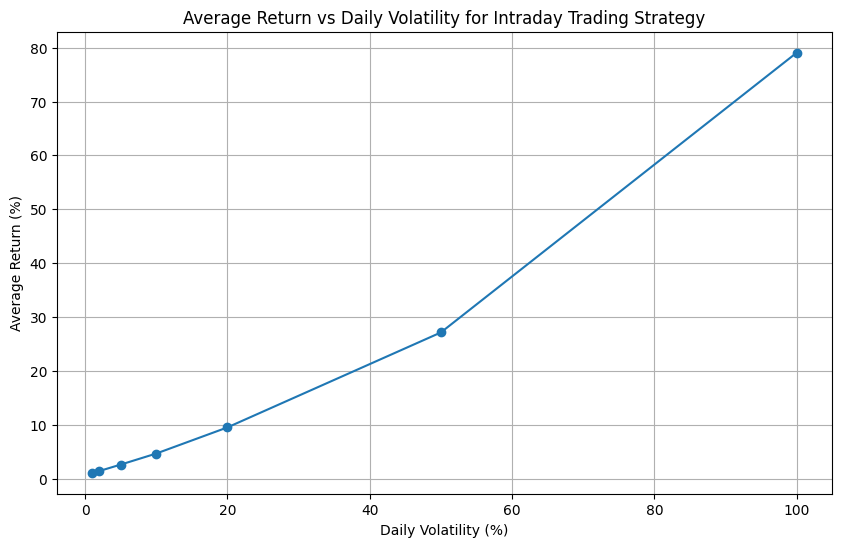

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation Parameters
# np.random.seed(42)             # For reproducibility
n_simulations = 10000          # Number of simulations
n_hours = 7                    # Trading hours in a day
daily_volatility_levels = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0] # Different volatility levels
dt = 1 / n_hours               # Time step for each hour (normalized to 1 day)
initial_price = 1.0            # Initial stock price
end_price_up = 1.01            # End price when stock goes up by 1%

# Function to simulate Brownian Bridge paths
def simulate_brownian_bridge(start, end, T, sigma, n_steps):
    dt = T / n_steps
    brownian_motion = np.cumsum(np.random.normal(0, np.sqrt(dt) * sigma, n_steps))
    bridge_adjustment = (end - start) * np.linspace(0, 1, n_steps)
    return start + brownian_motion - bridge_adjustment + (end - start) * (np.linspace(0, 1, n_steps))

# Function to simulate the trading strategy
def simulate_intraday_strategy(volatility):
    total_returns = []
    for _ in range(n_simulations):
        # Simulate stock path with given volatility
        stock_path = simulate_brownian_bridge(initial_price, end_price_up, 1, volatility, n_hours)
        holdings = 0.0
        cash = 1.0  # Start with 1 unit of cash

        # Trading Strategy
        for price in stock_path:
            if price < end_price_up:
                # Buy when price is below the end price
                shares_to_buy = cash / price
                holdings += shares_to_buy
                cash = 0.0
            elif price > end_price_up and holdings > 0:
                # Sell when price is above the end price
                cash += holdings * price
                holdings = 0.0

        # Calculate final portfolio value
        final_value = cash + holdings * end_price_up
        total_returns.append(final_value - 1.0)  # Net return relative to initial investment
    return np.mean(total_returns)

# Run simulations for different volatility levels and plot results
volatility_returns = []
for vol in daily_volatility_levels:
    avg_return = simulate_intraday_strategy(vol)
    volatility_returns.append(avg_return)
    print(f"Volatility: {vol*100:.1f}%, Average Return: {avg_return*100:.2f}%")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot([v * 100 for v in daily_volatility_levels], [r * 100 for r in volatility_returns], marker='o')
plt.xlabel('Daily Volatility (%)')
plt.ylabel('Average Return (%)')
plt.title('Average Return vs Daily Volatility for Intraday Trading Strategy')
plt.grid(True)
plt.show()
